<a href="https://colab.research.google.com/github/fbamuse/GCP/blob/master/CapstoneProject0429_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense, Activation,Flatten

from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Flatten, Convolution1D,MaxPooling1D,Conv1D
from keras import optimizers

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
from keras.preprocessing.sequence import TimeseriesGenerator

from scipy import signal
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=10000)


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import urllib.request
import zipfile

urllib.request.urlretrieve('https://ti.arc.nasa.gov/c/6/','./nasa.zip')

with zipfile.ZipFile('./nasa.zip') as existing_zip:
    existing_zip.extractall('./nasa')

# File load/ data chack

In [0]:
#header
header = ['unit','time']
for i in range(1,4):
  header.append ('OptionSetting'+str(i))
for i in range(1,22):
  header.append ('x'+str(i))

#TRAIN

#df_train=pd.read_table('gdrive/My Drive/nanodegree/train_FD002.txt',header=None, delim_whitespace=True)
df_train=pd.read_table('nasa/train_FD002.txt',header=None, delim_whitespace=True)
df_train.columns = header
df_train['type']='train'

#TEST
#df_test=pd.read_table('gdrive/My Drive/nanodegree/test_FD002.txt',header=None, delim_whitespace=True)
df_test=pd.read_table('nasa/test_FD002.txt',header=None, delim_whitespace=True)
df_test.columns = header
df_test['type']='test'

#CONCAT TRAIN & TEST
df = pd.concat([df_train, df_test])

#RUL
#df_rul=pd.read_table('gdrive/My Drive/nanodegree/RUL_FD002.txt',header=None, delim_whitespace=True)
df_rul=pd.read_table('nasa/RUL_FD002.txt',header=None, delim_whitespace=True)


df['OptionSetting1']=round(df['OptionSetting1'], 1)
df['OptionSetting2']=round(df['OptionSetting2'], 2)
df['OptionSetting3']=round(df['OptionSetting3'], 2)

#Changing column order 
col = df.columns.tolist() # 
col.remove('unit') 
col.append('unit')
col.remove('time') 
col.append('time')
col.remove('type') 
col.append('type')
col.remove('OptionSetting1') 
col.append('OptionSetting1')
col.remove('OptionSetting2') 
col.append('OptionSetting2')
col.remove('OptionSetting3') 
col.append('OptionSetting3')
df = df[col]

In [0]:
a=TensorDataset()

option setting毎に各センサーの値のレンジが異なる。各UnitUnit毎日option settingが異なるため、センサー値から寿命予測を

#  StandardScaler

In [0]:
 
from sklearn.preprocessing import  MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

def  MinMaxScaler_df_mode(df):
    scaler =  MinMaxScaler()
    #scaler = StandardScaler()
    C=np.empty(len(df.columns))

    for i in df['OptionSetting1'].unique():
      A=df.query('OptionSetting1 ==@i').iloc[:, :-6]
      b=df.query('OptionSetting1 ==@i').iloc[:,[-6,-5,-4,-3,-2,-1]].values#標準化対象外を避ける
      scaler.fit(A)
  
      a=scaler.transform(A)
      c = np.block([a,b])
      C = np.block([[C],[c]])
    
    DF=pd.DataFrame(C, columns=df.columns)
    DF= DF.sort_values(['type','unit','time'], ascending=[True,True,True]).reset_index(drop=True)
    DF= DF.drop(0, axis=0)
    return(DF)

df_scale=MinMaxScaler_df_mode(df)
df_scale_train=df_scale.query('type=="train"')
df_scale_test=df_scale.query('type=="test"')


In [0]:
df_scale_train.query('unit==4')['time'].values

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

In [0]:
#plt.plot(df_scale_out_train.query('unit==4')['time'],df_scale_out_train.query('unit==4')['x3'],alpha=1, label="ewm")
plt.scatter(df_scale_train.query('unit==4')['time'],df_scale_train.query('unit==4')['x3'],alpha=0.3, label="original")
plt.plot(df_scale_train.query('unit==4')['time'].values, func(df_scale_train.query('unit==4')['time'].values, *popt), 'r-', label='fit')
plt.legend(loc="upper left", fontsize=13) 

In [0]:
 func(df_scale_train.query('unit==4')['time'].values, *popt)

In [0]:
import scipy
import matplotlib.pyplot as plt
for i in range(1,22):
    feature='x'+str(i)
    scipy.stats.probplot(df_scale_out_train[feature].astype(float), plot=plt)
    plt.title(feature)
    plt.show()


#outer.ewm

In [0]:
def outer(df, ewm_span=10, threshold=1):
  for i in range(1,22):
    i='x'+str(i)
    #j=i+'mean'
    #ewm_mean=df[i].rolling(ewm_span,center=False).median()
    ewm_mean=df[i].ewm(span=ewm_span,min_periods=5).mean()
    df[i]=ewm_mean
    ewm_mean=df[i].ewm(span=ewm_span,min_periods=5).mean()
    df[i]=ewm_mean
    #ewm_mean=df[i].ewm(span=ewm_span,min_periods=5).mean()
    #df[i]=ewm_mean
    #ewm_std=df[i].rolling(ewm_span, min_periods=1,center=False).std()
    #print("x={},count={}".format(i,df[i][(df[i] - ewm_mean).abs() > ewm_std * threshold].count()))
    #df[i][(df[i] - ewm_mean).abs() > ewm_std * threshold]=ewm_mean

  return(df)

def outer_df_unit(df):
  DF=pd.DataFrame(index=[], columns=[])
  for i in df['unit'].unique():
     #print(i)
     A=df.query('unit ==@i')
     A['RUL']=A.time.values[::-1]-1
     df1=outer(A)
     DF=pd.concat([DF, df1],axis=0)
  DF= DF.sort_values(['type','unit','time'], ascending=[True,True,True]).reset_index(drop=True)
  return(DF)
  

#df_scale_out_train=outer_df_unit(df_scale_train).dropna()
df_scale_out_train=outer_df_unit(df_scale_train)
df_scale_out_test=outer_df_unit(df_scale_test)
#削除　x1,x5,x6,x10,x16,x18,x19
x_list_1=['x2','x3','x4','x6','x7','x8','x9','x11','x12','x13','x14','x15','x17','x20','x21']
x_list_1=['x2','x3','x4','x6','x7','x8','x11','x12','x13','x15','x17','x20','x21']
x_list_3=['x2','x3','x4','x7','x11','x12','x15','x17','x20','x21']

In [0]:
df_scale_out_train[df_scale_out_train['unit']==1][x_list_1]

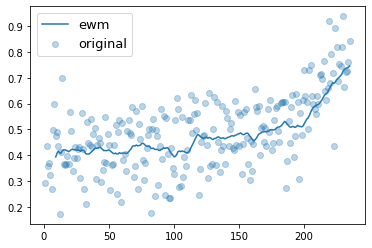

In [0]:
plt.plot(df_scale_out_train.query('unit==4')['time'],df_scale_out_train.query('unit==4')['x3'],alpha=1, label="ewm")
plt.scatter(df_scale_train.query('unit==4')['time'],df_scale_train.query('unit==4')['x3'],alpha=0.3, label="original")
plt.legend(loc="upper left", fontsize=13) 

#Tensorbord

In [0]:
from torch.utils.tensorboard import SummaryWriter

# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/tensorlog')

In [0]:
!kill 1931

In [9]:
% load_ext tensorboard
% tensorboard --logdir 'runs/tensorlog'

<IPython.core.display.Javascript object>

In [0]:
#%reload_ext tensorboard
!kill 2987

/bin/bash: line 0: kill: (2987) - No such process


#dataset

In [0]:
import torch
from torch.utils.data import Dataset, DataLoader,TensorDataset,Sampler
from torchvision import transforms, utils
class MyDataset(Dataset):
    def __init__(self,df,xlist,shift=20,span=1, transform=None):
        self.shift  = int(shift)
        self.span   = span
        self.x_input  = df[xlist].values
        self.output = df['RUL'].values
        self.transform = transform

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
          idx = idx.tolist()
        y=  self.output[idx+self.shift]


        x= self.x_input[idx:idx+self.shift]
  
    
        if self.transform:
            x=self.transform(x)
            y=self.transform(y)
        return x.permute(1,0),y.view(1)
    
    def __len__(self):
        return self.x_input.shape[0]-self.shift

dataset = MyDataset(df_scale_out_train,x_list_1,20,transform=torch.tensor)
#transform = transforms.ToTensor()
#dataset = MyDataset(df_scale_out_train,x_list_1,20)
#print(dataset[5][1])
from torch.utils.data.sampler import BatchSampler
class SkipSampler(BatchSampler):

    def __init__(self, dataset,batch_size):
        self.dataset    =dataset
        self.count      =0
        self.batch_size =batch_size

    def __iter__(self):
        while self.count + self.batch_size < len(self.dataset):
          indices=[]
          while len(indices)<self.batch_size:
            x,  y = self.dataset[self.count][0],  self.dataset[self.count][1]
            if ~torch.isnan(x).any():
              indices.append(self.count)
            self.count+=1
          yield indices

    def __len__(self):
        return len(self.dataset)

In [0]:
#train_loader = torch.utils.data.DataLoader(dataset)
train_ds = MyDataset(df_scale_out_train,x_list_1,4,transform=torch.tensor)
bs=64
skip_train=SkipSampler(train_ds,bs)
#train_loader = torch.utils.data.DataLoader(train_ds)
train_loader = torch.utils.data.DataLoader(train_ds, batch_sampler=skip_train)
#xb, yb = train_ds[1: 13]
#print(xb)
my_testiter = iter(train_loader)
#
#


In [0]:
xb,yb  = my_testiter.next()
print(yb)
print(xb.permute(0,2,1).shape)
print(xb.shape)

tensor([[133]])
torch.Size([1, 4, 13])
torch.Size([1, 13, 4])


In [0]:
xb,yb  = my_testiter.next()
print(yb)
print(xb)

In [0]:
xb,yb  = my_testiter.next()
print(yb)
print(xb)

#Model 

In [0]:
import torch.nn as nn
class LSTM1(nn.Module):
    def __init__(self):
        super(LSTM1, self).__init__()
        self.hidden_size=200
        self.lstm   = nn.LSTM(input_size=13,hidden_size=self.hidden_size, num_layers=50,dropout=0.2, batch_first=True)
        self.bn1    = nn.BatchNorm1d(self.hidden_size)
        self.relu   = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.fc1    = nn.Linear(self.hidden_size,128)
        self.bn2    = nn.BatchNorm1d(128)
        self.fc2    = nn.Linear(128,1)
        #self.fc3    = nn.Linear(128,1)
        #self.h0     = torch.randn(128,1,128)
        #self.c0     = torch.randn(128,1,128)       

    def forward(self, x):
        #print(x.shape)
        #print(x)
        x,a = self.lstm(x)
        x=x[:,-1,:]
        #x = self.relu(x)
        #print(x)
        x=self.bn1(x)
        #print(x)    


        #print(x.shape)
        
        #print(x.shape)
        #return x
        #x,_ = self.lstm(x,(self.h0,self.c0))
       
        #x = self.bn1(x)
        
        #print(x.shape)
       
        
        x = self.fc1(x)
        x = self.relu(x)
        #print(x)
        x=self.bn2(x)
        x = self.relu(self.fc2(x))
        #print(x.shape)
        #x = self.relu( x.view(x.size(0),1,-1))
        #print(x.shape)

        
        #print(x.shape)
        #x = self.relu(self.fc3(x))
        #print(x)
        return x

model = LSTM1() 
device = torch.device('cuda')  # or 'cpu'
#model = model.to(device)

In [44]:

#rnn = nn.LSTM(13, 128, 128,batch_first=True,dropout=0.2)
input = torch.randn(2,20,13)
##h0 = torch.randn(2, 20, 128)
#c0 = torch.randn(2, 20, 128)
#output= rnn(input)
output= model(input)
print(output)

tensor([[0.1782],
        [0.0000]], grad_fn=<ReluBackward0>)


In [0]:
from torchsummary import summary

summary(model,(20,13))


#CNN

In [0]:
import torch.nn as nn

class Net1D(nn.Module):
    def __init__(self):
        super(Net1D,self).__init__()

        self.conv1 = nn.Conv1d(13, 64,kernel_size=5, stride=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.relu = nn.ReLU()
        #self.maxpool = nn.MaxPool1d(kernel_size=5, stride=1)

        self.conv2 = nn.Conv1d(64, 32,kernel_size=3, stride=1)
        self.bn2 = nn.BatchNorm1d(32)

        self.conv3 = nn.Conv1d(32,1,kernel_size=3, stride=1)
        self.gap = nn.AdaptiveAvgPool1d(1)
        self.dropout2 = nn.Dropout(p=0.3)

        self.fc1 = nn.Linear(448,128)

        self.fc2 = nn.Linear(128,1)




    def forward(self,x):

        x = self.conv1(x)
        #x = self.bn1(x)
        #x = self.relu(x)

        x = self.conv2(x)
        #x = self.bn2(x)
        x = self.relu(x)
        #print(x.shape)
        #x = self.gap(x)
        #print(x.shape)
        #x = self.conv3(x)
        #print(x.size(0))
        x = x.view(x.size(0),1,-1)
        
        #print(x.shape)
        
        #print(x.shape)

        x = self.fc1(x)
        x=self.dropout2(x)
        x = self.fc2(x)        

        #print(x) 
        return x

model= Net1D()
#model=model.floa

In [0]:
from torchsummary import summary
#model = Net1D()
summary(model,(13,20)) # summary(model,(channels,H,W)

in_data = torch.randn(32,13,20)
out_data = model(in_data)
print(out_data.size())

tensor([[[0.0668]],

        [[0.5388]]], device='cuda:0', grad_fn=<AddBackward0>)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 64, 16]           4,224
            Conv1d-2               [-1, 32, 14]           6,176
       BatchNorm1d-3               [-1, 32, 14]              64
              ReLU-4               [-1, 32, 14]               0
            Linear-5               [-1, 1, 128]          57,472
           Dropout-6               [-1, 1, 128]               0
            Linear-7                 [-1, 1, 1]             129
Total params: 68,065
Trainable params: 68,065
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.26
Estimated Total Size (MB): 0.28
----------------------------------------------------------------


RuntimeError: ignored

# Train

In [0]:
from torch import optim
#lr=0.0002
#opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
learning_rate = 1e-3
opt= optim.Adam(model.parameters(), lr=learning_rate)


In [0]:
#import torch.nn.functional as F
loss_func = nn.MSELoss()

In [0]:
train_ds = MyDataset(df_scale_out_train,x_list_1,20,transform=torch.tensor)
test_ds = MyDataset(df_scale_out_test,x_list_1,20,transform=torch.tensor)
bs=64
skip_train=SkipSampler(train_ds,bs)
skip_test=SkipSampler(test_ds,bs)
train_loader = torch.utils.data.DataLoader(train_ds, batch_sampler=skip_train)
test_loader = torch.utils.data.DataLoader(test_ds, batch_sampler=skip_test)

In [26]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())

True
1


In [0]:
device = torch.device('cuda')  # or 'cpu'
model = model.to(device)

In [0]:
epoch=100

for e in range(epoch):
    train_ds = MyDataset(df_scale_out_train,x_list_1,20,transform=torch.tensor)
    test_ds = MyDataset(df_scale_out_test,x_list_1,20,transform=torch.tensor)
    bs=128
    skip_train=SkipSampler(train_ds,bs)
    skip_test=SkipSampler(test_ds,bs)
    train_loader = torch.utils.data.DataLoader(train_ds, batch_sampler=skip_train)
    test_loader = torch.utils.data.DataLoader(test_ds, batch_sampler=skip_test)
    model.train()
    running_loss = 0.0
    for i,(xb, yb) in enumerate(train_loader):
        #print(xb.permute(0,2,1).float())
        #pred = model(xb.float().to(device))
        pred = model(xb.permute(0,2,1).float().to(device))
        
        loss = loss_func(pred, yb.float().to(device))
        #print(loss,pred,yb)
        #print(pred)
        opt.zero_grad()
        loss.backward()
        opt.step()
        running_loss += loss.item()
        if i % 100 == 99:    # every 100 mini-batches...
            writer.add_scalar('training loss',running_loss/((i + 1) * bs), e*len(train_loader) + i)
            print('Training log: {} epoch ({} train. data). Loss: {}'.format(e + 1,(i + 1) * bs,running_loss/((i + 1) * bs)))

    model.eval()
    with torch.no_grad():
        valid_loss = sum(loss_func(model(xb.permute(0,2,1).float().to(device)),yb.float().to(device)) for xb, yb in test_loader)
        #valid_loss = sum(loss_func(model(xb.float().to(device)),yb.float().to(device)) for xb, yb in test_loader)
    print(epoch, valid_loss/len(test_loader),running_loss/len(train_loader))

Training log: 1 epoch (12800 train. data). Loss: 38.375616302490236


In [0]:

test_ds = MyDataset(df_scale_out_test,x_list_1,20,transform=torch.tensor)
skip_test=SkipSampler(test_ds,2)
test_loader = torch.utils.data.DataLoader(test_ds, batch_sampler=skip_test)
y,p,n=[],[],[]
nc=0

In [39]:


for i,(xb, yb) in enumerate(test_loader):
  with torch.no_grad():
    pred =model(xb.permute(0,2,1).float().to(device))
    #pred =model(xb.float().to(device))
  #y.append(yb.detach().numpy()[0][0])
  #p.append(pred.cpu().detach().numpy()[0][0][0])
  print(pred.cpu().detach().numpy()[0][0])
  print(yb.detach().numpy()[0][0])
  if i==4:
    break
  n.append(nc)
  if yb.detach().numpy()[0][0] == 0:
    nc+=1
files_df = pd.DataFrame({'y':y,'p':p,'n':n})
files_df


117.57066
203
48.988007
201
36.366344
199
0.0
197
38.329243
195


ValueError: ignored

In [0]:
def plot_result(data):
  g = sns.FacetGrid(data, col="n",col_wrap=10)
  #g = sns.FacetGrid(data, col="x_1", col_wrap=5, ,)
  #g = g.map(plt.scatter,"target","predict",edgecolor="w")
  g = g.map(plt.plot,"y","p",color="b")
  g = g.map(plt.plot,"y","y",color="m")

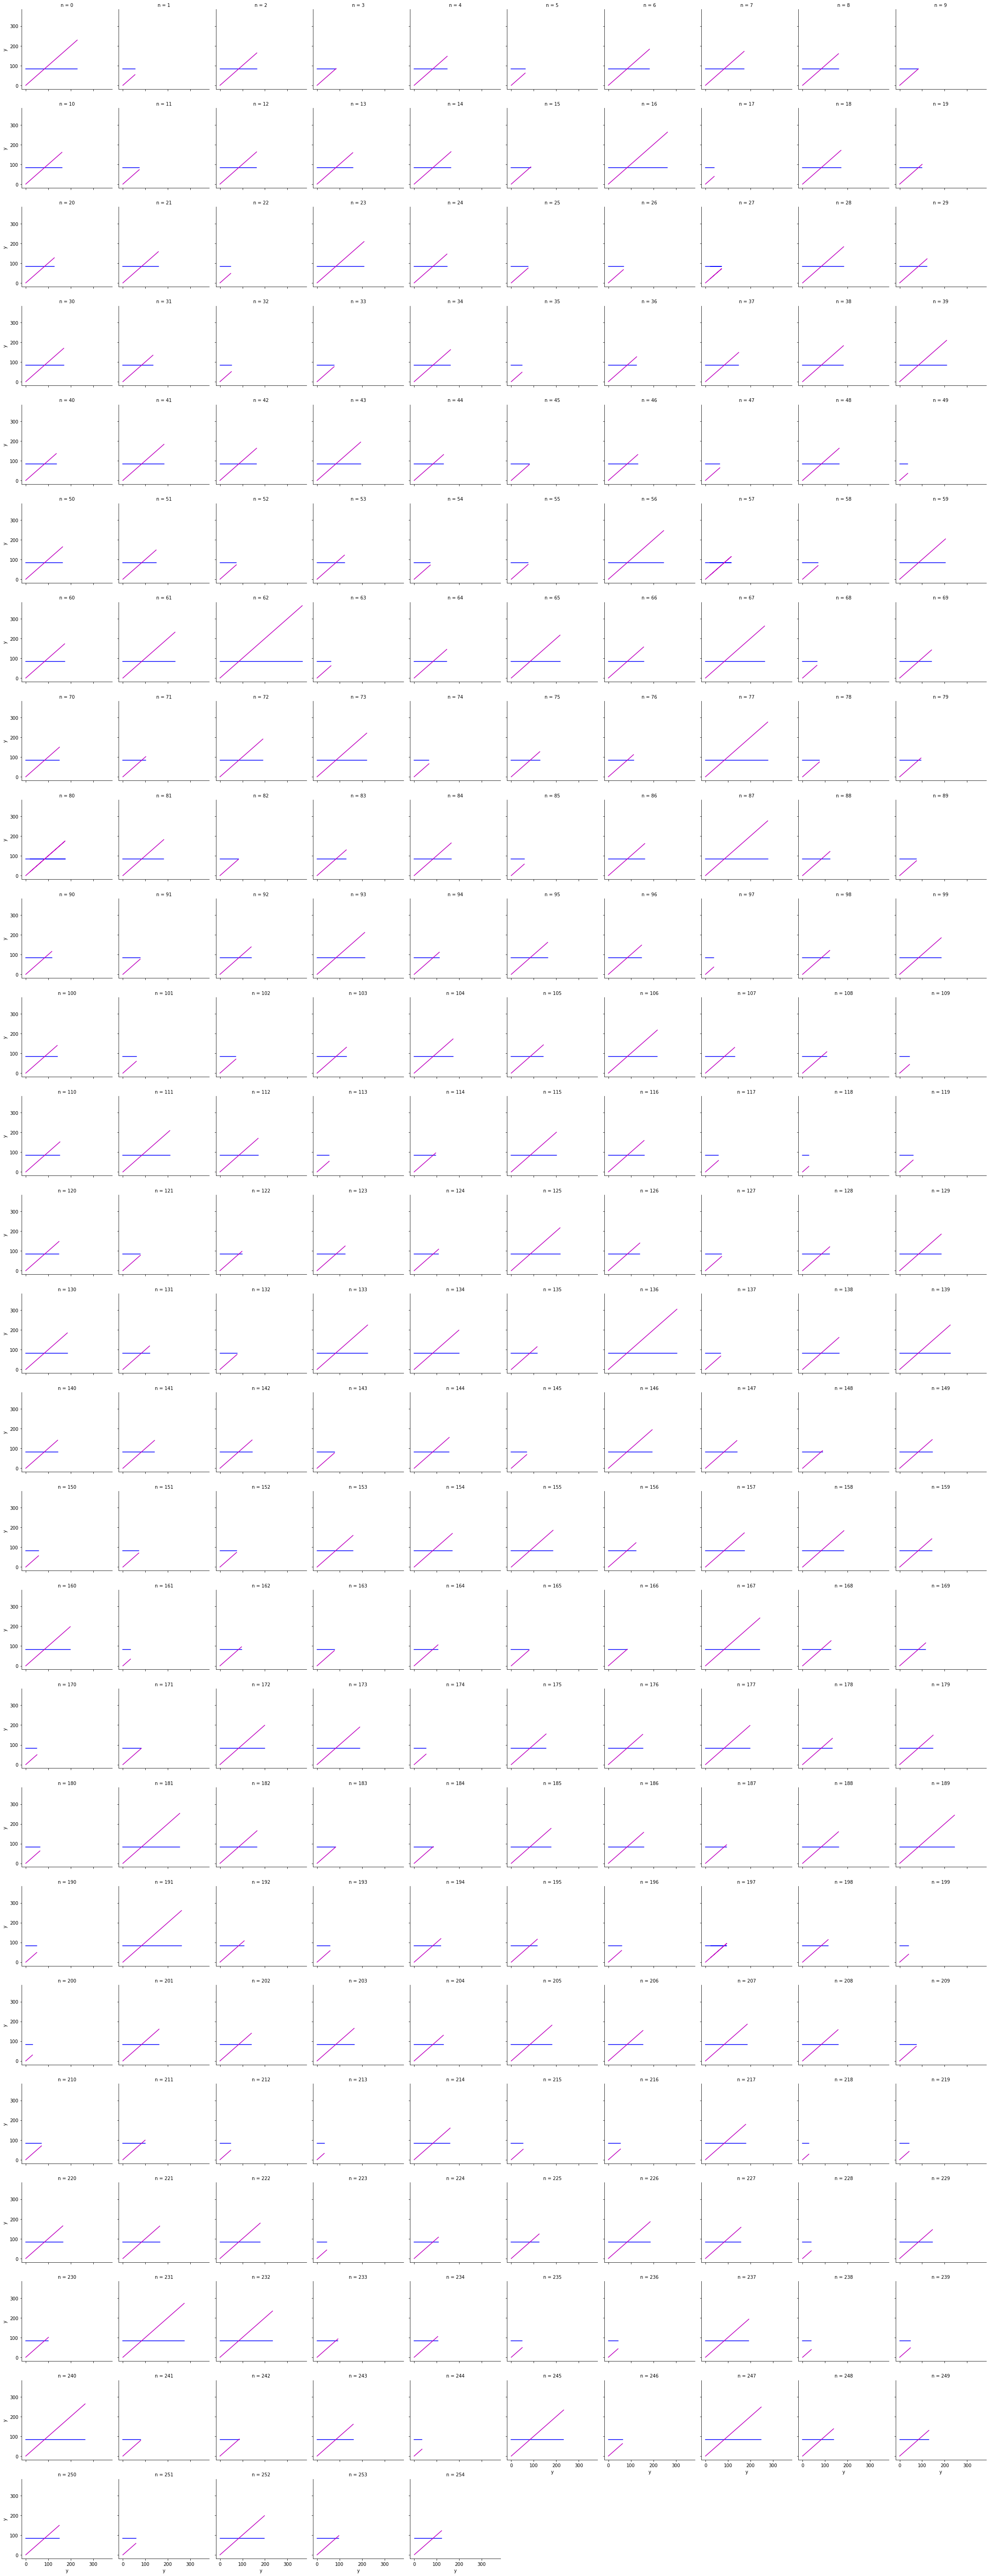

In [0]:
 plot_result(files_df)

#benchmark model

# 1DCONV

In [0]:
X_train.shape[1:3]

(10, 14)

In [0]:
from keras.initializers import random_uniform
SEED = 42
np.random.seed(SEED)
input_dimension = 256
learning_rate = 0.001
momentum = 0.85
hidden_initializer = random_uniform(seed=SEED)
dropout_rate = 0.3

"""
model = Sequential()
model.add(Convolution1D(64, 5, activation='relu', input_shape=X_train.shape[1:3]))
model.add(Convolution1D(64, 5, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Convolution1D(32, 4, activation='relu'))
model.add(Convolution1D(32, 4, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


"""



# create model
model = Sequential()
model.add(Conv1D(nb_filter=64, filter_length=5, input_shape=X_train.shape[1:3], activation='relu'))
model.add(Conv1D(nb_filter=64, filter_length=5, activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout_rate))
model.add(Dense(64, input_dim=input_dimension, kernel_initializer=hidden_initializer, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(32, kernel_initializer=hidden_initializer, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
#model.add(Dropout( dropout_rate))
model.add(Dense(1))
model.add(Activation("linear"))


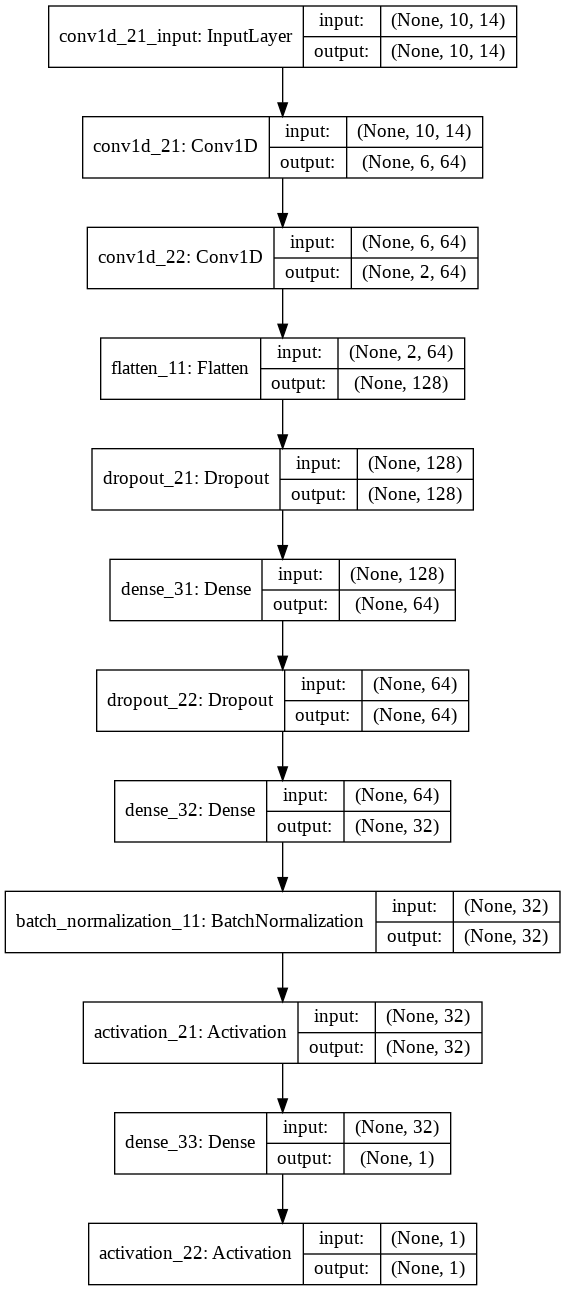

In [0]:
from keras.utils import plot_model 

plot_model(model, show_shapes=True,show_layer_names=True,to_file='model.png')

In [0]:
#sgd = SGD(lr=learning_rate, momentum=momentum)
#model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['acc'])
opt = optimizers.adam(learning_rate,beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0, amsgrad=False)
model.compile(loss="mae", optimizer=opt,metrics=['mse'])

#model.fit(X_train, y_train,epochs=100,batch_size=64,validation_split=0.3)


In [0]:
history=model.fit(X_train, Y_train,epochs=400,batch_size=64,validation_split=0.2)

Train on 39470 samples, validate on 9868 samples
Epoch 1/400
39470/39470 [==============================] - 4s 113us/step - loss: 25.0554 - mse: 1514.8102 - val_loss: 26.6049 - val_mse: 1640.6432
Epoch 2/400
39470/39470 [==============================] - 4s 112us/step - loss: 25.0126 - mse: 1508.8337 - val_loss: 27.8501 - val_mse: 1813.8024
Epoch 3/400
39470/39470 [==============================] - 4s 112us/step - loss: 25.1207 - mse: 1524.1191 - val_loss: 26.4684 - val_mse: 1651.4960
Epoch 4/400
39470/39470 [==============================] - 4s 111us/step - loss: 25.0628 - mse: 1515.2891 - val_loss: 27.1384 - val_mse: 1740.2480
Epoch 5/400
39470/39470 [==============================] - 4s 112us/step - loss: 25.1608 - mse: 1518.4237 - val_loss: 28.6257 - val_mse: 1934.7324
Epoch 6/400
39470/39470 [==============================] - 4s 112us/step - loss: 25.0916 - mse: 1521.2820 - val_loss: 26.6315 - val_mse: 1613.4313
Epoch 7/400
39470/39470 [==============================] - 4s 112us/s

In [0]:
predictions = model.predict_proba(X_test)

ans = pd.DataFrame(predictions)
ans = ans[0]

In [0]:
history

history
history
history


# define LSTM

In [0]:
import optuna
def create_model(x1_unit,x2_unit,x3_unit, activation, dropout_rate,dim,lag):

    model = Sequential()

    model.add(LSTM(x1_unit,return_sequences=True, input_shape=(lag,dim)))
    #model.add(Dropout( dropout_rate))
    model.add(LSTM(x2_unit))
    model.add(Dropout( dropout_rate))
    #model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(Dense(x2_unit))
    model.add(Dropout( dropout_rate))

    model.add(BatchNormalization())
    model.add(Activation(activation))
    #model.add(Dropout( dropout_rate))
    
    model.add(Dense(1))
    
    model.add(Activation("linear"))
    return model


from keras.callbacks import EarlyStopping
def objective(trial):
    

    
    x1_unit = int(trial.suggest_discrete_uniform('x1_unit', 100,600,10) )
    x2_unit = int(trial.suggest_discrete_uniform('x2_unit', 10,600,10)) 
    x3_unit = int(trial.suggest_discrete_uniform('x3_unit', 10,600,10))

    dropout_rate = trial.suggest_uniform('dropout_rate', 0, 1)
    activation = trial.suggest_categorical('activation', ['relu', 'sigmoid'])
    optimizer = trial.suggest_categorical('optimizer', ['sgd', 'adam', 'rmsprop'])
 
    #x_ = trial.suggest_categorical('x_list',['1','2'])
    #if x_ == "1":
    #  x_list=x_list_1
    #else:
    #  x_list=x_list_2


    #length = int(trial.suggest_discrete_uniform('length', 15,30,3))
    length = 15
    sampling_rate=3
    lag=int(length/sampling_rate)
    dim=len(x_list)

    #    opt = optimizers.adam(learning_rate,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #elif optimizer == "rmsprop":
    #    opt = optimizers.rmsprop(learning_rate)
                                       
                                          
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1)
    #activation='relu'
    model = create_model(x1_unit,x2_unit,x3_unit, activation, dropout_rate,dim,lag)

    #if optimizer == "sgd":
    #    opt = optimizers.SGD(learning_rate)
    #elif optimizer == "adam":
    #    opt = optimizers.adam(learning_rate,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #elif optimizer == "rmsprop":
    #    opt = optimizers.rmsprop(learning_rate)
    opt = optimizers.adam(learning_rate,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="mae", optimizer=opt,metrics=['mse'])
    
    X_train,Y_train =X_Y(df_scale_out_train,Train_list,x_list,dim,length,sampling_rate,lag)


    history=model.fit(X_train, Y_train,epochs=20,shuffle=True,batch_size=128,validation_split=0.3)
    #print(history.history['val_mean_absolute_error'])
    #print(history.history['val_mean_absolute_error'][-1])
    return history.history['val_mean_squared_error'][-1]

    #optimizer = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    #optimizer = optimizers.Adam(lr=0.005)
    ##model = create_model(num_layer, activation, mid_units, num_filters, dropout_rate)
    



ModuleNotFoundError: ignored

In [0]:
22#study = optuna.create_study(sampler=optuna.samplers.TPESampler())
study_name = 'example-study2'
study = optuna.create_study(study_name=study_name,
                            #storage='sqlite:///gdrive/My Drive/optuna_study.db',
                            storage='sqlite:///gdrive/My Drive/optuna_study4.db',
                            load_if_exists=True)

study.optimize(objective, n_trials=200)
print(study.best_params)
print(study.best_value)
print(study.best_trial)


[I 2020-03-14 08:56:07,828] Using an existing study with name 'example-study2' instead of creating a new one.


Train on 33445 samples, validate on 14334 samples
Epoch 1/20
33445/33445 [==============================] - 12s 366us/step - loss: 76.8511 - mean_squared_error: 9768.2844 - val_loss: 45.6173 - val_mean_squared_error: 3808.7227
Epoch 2/20
33445/33445 [==============================] - 10s 297us/step - loss: 44.5100 - mean_squared_error: 3815.1627 - val_loss: 34.9439 - val_mean_squared_error: 2279.1223
Epoch 3/20
33445/33445 [==============================] - 10s 297us/step - loss: 38.2626 - mean_squared_error: 2750.5083 - val_loss: 34.2773 - val_mean_squared_error: 2050.7276
Epoch 4/20
33445/33445 [==============================] - 10s 297us/step - loss: 36.5825 - mean_squared_error: 2501.0401 - val_loss: 32.0466 - val_mean_squared_error: 1757.3712
Epoch 5/20
33445/33445 [==============================] - 10s 296us/step - loss: 35.8614 - mean_squared_error: 2390.2709 - val_loss: 32.4349 - val_mean_squared_error: 1752.6983
Epoch 6/20
33445/33445 [==============================] - 10s 295

[I 2020-03-14 08:59:50,781] Finished trial#5 resulted in value: 1688.0429604978629. Current best value is 1688.0429604978629 with parameters: {'activation': 'sigmoid', 'dropout_rate': 0.24002270299214823, 'learning_rate': 0.026072499609513907, 'optimizer': 'adam', 'x1_unit': 140.0, 'x2_unit': 240.0, 'x3_unit': 10.0}.


Train on 33445 samples, validate on 14334 samples
Epoch 1/20
33445/33445 [==============================] - 14s 414us/step - loss: 109.4411 - mean_squared_error: 16269.1247 - val_loss: 100.9828 - val_mean_squared_error: 13632.7596
Epoch 2/20
33445/33445 [==============================] - 11s 328us/step - loss: 109.3104 - mean_squared_error: 16240.1810 - val_loss: 100.8516 - val_mean_squared_error: 13606.0362
Epoch 3/20
33445/33445 [==============================] - 11s 330us/step - loss: 109.1799 - mean_squared_error: 16211.7508 - val_loss: 100.7248 - val_mean_squared_error: 13580.3305
Epoch 4/20
33445/33445 [==============================] - 11s 331us/step - loss: 109.0494 - mean_squared_error: 16183.3431 - val_loss: 100.5926 - val_mean_squared_error: 13553.5314
Epoch 5/20
33445/33445 [==============================] - 11s 327us/step - loss: 108.9185 - mean_squared_error: 16155.2783 - val_loss: 100.4605 - val_mean_squared_error: 13526.7719
Epoch 6/20
33445/33445 [=====================

[I 2020-03-14 09:03:54,078] Finished trial#6 resulted in value: 13127.619137899836. Current best value is 1688.0429604978629 with parameters: {'activation': 'sigmoid', 'dropout_rate': 0.24002270299214823, 'learning_rate': 0.026072499609513907, 'optimizer': 'adam', 'x1_unit': 140.0, 'x2_unit': 240.0, 'x3_unit': 10.0}.


KeyboardInterrupt: ignored

In [0]:
study = optuna.create_study(study_name='example-study2', storage='sqlite:///gdrive/My Drive/optuna_study3.db', load_if_exists=True)
df = study.trials_dataframe(attrs=('number', 'value', 'params', 'state'))
df.sort_values('value').head(5)

#BestModel

In [0]:
x1_unit=200 #280
x2_unit=100 #500
x3_unit=25 #300
activation='relu'
dropout_rate=0.5
learning_rate=0.001

x_list=x_list_1
length = 12
sampling_rate=2
lag=int(length/sampling_rate)
dim=len(x_list)

epochs=20

    
#X_train,Y_train =X_Y(df_scale_out_train,Train_list,x_list,dim,length,sampling_rate,lag)

model = create_model(x1_unit,x2_unit,x3_unit, activation, dropout_rate,dim,lag)
#opt = optimizers.SGD(learning_rate)
opt = optimizers.adam(learning_rate,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss="mse", optimizer=opt,metrics=['mae'])


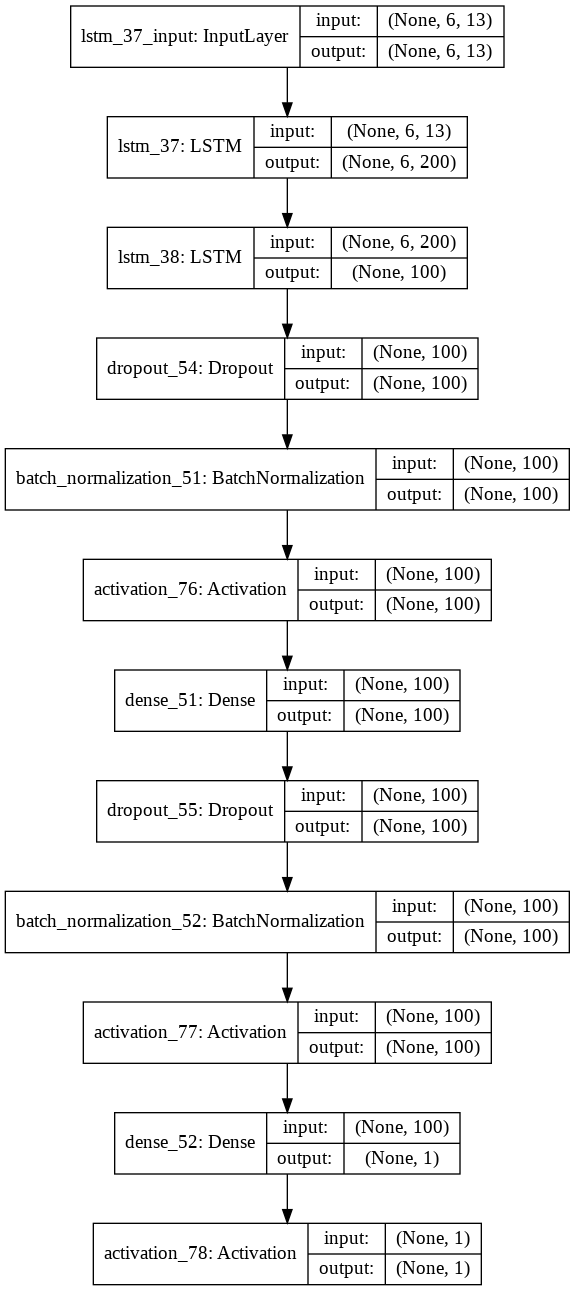

In [0]:
from keras.utils import plot_model 

plot_model(model, show_shapes=True,show_layer_names=True,to_file='model.png')

In [0]:
#model = create_model(x1_unit,x2_unit,x3_unit, activation, dropout_rate,dim,lag)
model.compile(loss="mse", optimizer=opt,metrics=['mae'])
history=model.fit(X_train, Y_train,epochs=100,shuffle=True,batch_size=64,validation_split=0.3)

Train on 33991 samples, validate on 14568 samples
Epoch 1/100
33991/33991 [==============================] - 29s 865us/step - loss: 10466.0989 - mean_absolute_error: 83.9551 - val_loss: 9137.4625 - val_mean_absolute_error: 76.9164
Epoch 2/100
33991/33991 [==============================] - 21s 618us/step - loss: 2448.8224 - mean_absolute_error: 35.7570 - val_loss: 2795.4989 - val_mean_absolute_error: 38.0875
Epoch 3/100
33991/33991 [==============================] - 21s 621us/step - loss: 1603.0799 - mean_absolute_error: 29.8255 - val_loss: 1762.7073 - val_mean_absolute_error: 30.3697
Epoch 4/100
33991/33991 [==============================] - 21s 625us/step - loss: 1530.3126 - mean_absolute_error: 28.7809 - val_loss: 2189.4776 - val_mean_absolute_error: 35.5116
Epoch 5/100
33991/33991 [==============================] - 21s 627us/step - loss: 1471.4361 - mean_absolute_error: 28.1892 - val_loss: 1992.0528 - val_mean_absolute_error: 33.1204
Epoch 6/100
33991/33991 [========================

KeyboardInterrupt: ignored

In [0]:
history.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline

epochs=30
plt.plot(range(1, 40+1), history.history['loss'], label="training")
plt.plot(range(1, 40+1), history.history['val_loss'], label="validation")
s
plt.legend()
plt.show()

NameError: ignored

In [0]:
model.fit(X_train, Y_train,epochs=40,shuffle=True,batch_size=512,validation_split=0.3)

Train on 33991 samples, validate on 14568 samples
Epoch 1/40
33991/33991 [==============================] - 1s 44us/step - loss: 24.8893 - mean_absolute_error: 24.8893 - val_loss: 25.0485 - val_mean_absolute_error: 25.0485
Epoch 2/40
33991/33991 [==============================] - 1s 43us/step - loss: 25.0433 - mean_absolute_error: 25.0433 - val_loss: 24.9754 - val_mean_absolute_error: 24.9754
Epoch 3/40
33991/33991 [==============================] - 1s 44us/step - loss: 24.8490 - mean_absolute_error: 24.8490 - val_loss: 25.1518 - val_mean_absolute_error: 25.1518
Epoch 4/40
33991/33991 [==============================] - 1s 44us/step - loss: 24.8250 - mean_absolute_error: 24.8250 - val_loss: 25.3341 - val_mean_absolute_error: 25.3341
Epoch 5/40
33991/33991 [==============================] - 1s 42us/step - loss: 24.7998 - mean_absolute_error: 24.7998 - val_loss: 25.0621 - val_mean_absolute_error: 25.0621
Epoch 6/40
33991/33991 [==============================] - 1s 42us/step - loss: 24.856

KeyboardInterrupt: ignored

#model evaluation

In [0]:
for i in range(1,260):

  df_t=df_scale_out_test.query('unit==@i')
  rul=df_rul[0][i-1]
  df_t['RUL']=df_t.time.values[::-1]
  df_t['RUL']=df_t['RUL']+rul-1



  gen=Generator(df_t,x_list,length,sampling_rate)
  pred = model.predict_generator(gen,steps=None,verbose=1)
  #print("fff",pred)
  pred1=pred.flatten().tolist()
  targets=gen.targets.flatten().tolist()
  del targets[0:lag*sampling_rate]

  frame = pd.DataFrame({'predict':pred1,'target':targets})
  frame['num']=i
  frame['model']="LSTM"
  result=pd.concat([result, frame],axis=0) 

ValueError: ignored

In [0]:
print ("tolal MAE",mean_absolute_error(result.query('model=="LSTM"')['target'], result.query('model=="LSTM"')['predict']))
print ("last10 MEA",mean_absolute_error_last(result.query('model=="LSTM"'),-2))


tolal MAE 34.4873013389979
last10 MEA 23.04747201121131


In [0]:
result['target']=result['target'].astype(float)
result['AE']=abs(result['target']-result['predict'])

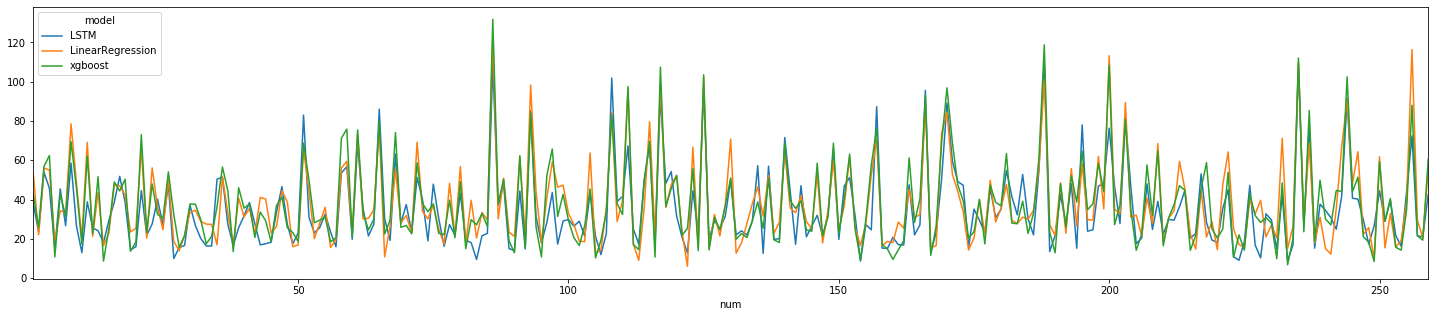

In [0]:
result1 =result.groupby(['model','num']).mean()
result1['AE'].unstack(0).plot(figsize=(25, 5))

In [0]:
result2=result.groupby(['model','num']).tail(1)
result3=result2.groupby(['model','num']).mean()
result3['AE'].unstack(0).plot(figsize=(25, 5))


In [0]:
result_sum=result.groupby(['model','num']).tail(1)
result_sum2=result_sum.groupby(['model']).mean()
result_sum2['AE']

model
LSTM                19.835492
LinearRegression    26.291274
xgboost             22.590732
Name: AE, dtype: float64

In [0]:
result_sum=result.groupby(['model','num']).tail(10)
result_sum2=result_sum.groupby(['model']).mean()
result_sum2['AE']

model
LSTM                21.866701
LinearRegression    26.615155
xgboost             23.699494
Name: AE, dtype: float64

In [0]:
result_sum=result.groupby(['model','num']).mean()
result_sum2=result_sum.groupby(['model']).mean()
result_sum2['AE']

model
LSTM                34.950176
LinearRegression    38.158921
xgboost             38.234108
Name: AE, dtype: float64

In [0]:
def plot_result(data):
  g = sns.FacetGrid(data, col="num",col_wrap=10)
  #g = sns.FacetGrid(data, col="x_1", col_wrap=5, ,)
  #g = g.map(plt.scatter,"target","predict",edgecolor="w")
  g = g.map(plt.plot,"target","predict",color="b")
  g = g.map(plt.plot,"target","target",color="m")

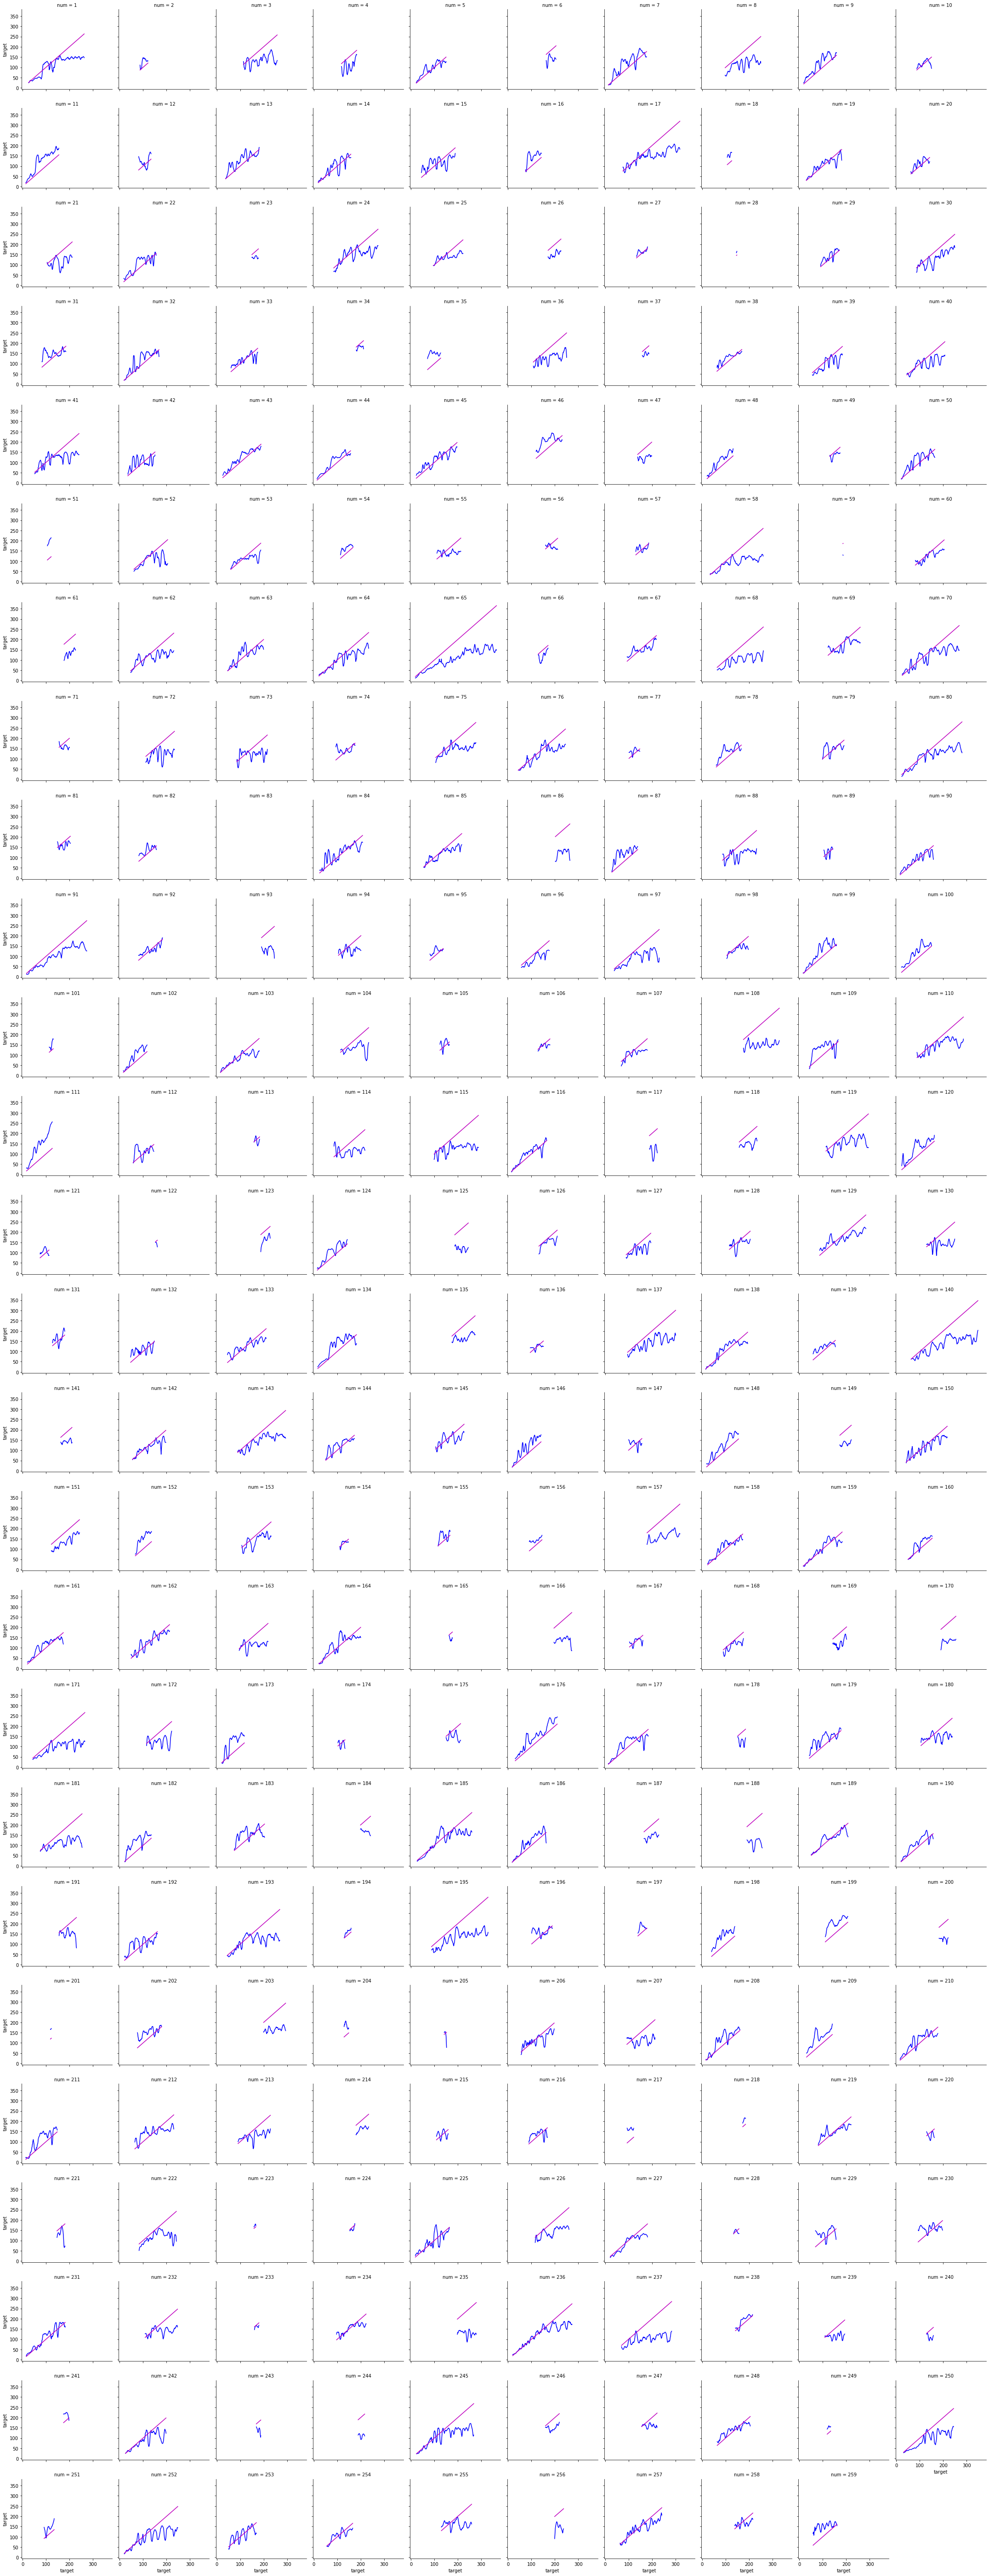

In [0]:
plot_result(result.query('model=="LSTM"'))

In [0]:
plot_result(result.query('model=="xgboost"'))

In [0]:
result.query('model=="LSTM"& num==43')

In [0]:
def result_plt(df):
  fig, ax = plt.subplots()
  line1, = ax.plot( df['target'],df['predict'], label='predict')
  line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break
  line2, = ax.plot(df['target'], df['target'] - 0.2, dashes=[6, 2], label='target')
  
  ax.set_xlim(0, 300)
  ax.set_ylim(0, 300)
  plt.xlabel('RUL')
  plt.ylabel('predict')
  ax.legend()
  plt.show()

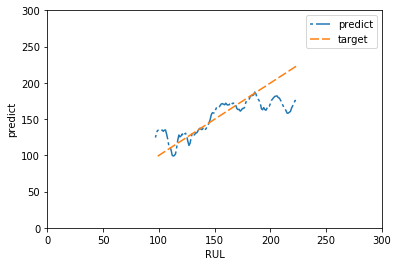

In [0]:
result_plt(result.query('model=="LSTM"& num==234'))

In [0]:
import pickle

with open('gdrive/My Drive/nanodegree/result', 'rb') as picX:
  result=pickle.load(picX)
result

In [0]:
import pickle

with open('gdrive/My Drive/nanodegree/result', 'wb') as picX:
  pickle.dump(result , picX)

In [0]:
json_string = model.to_json()
open('gdrive/My Drive/nanodegree/model.json', 'w').write(json_string)
model.save_weights('gdrive/My Drive/nanodegree/weights.h5')

In [0]:
model.load_weights('gdrive/My Drive/nanodegree/weights.h5')